Рабочая тетрадь №3 Мурдасов И.А./ ИМБО-01-24

№1.3.1

Задайте 4 точки в трехмерном пространстве, рассчитайте между ними расстояния по описанным в примере выше метрикам. Отобразите точки в трехмерном пространстве.

1.7320508075688772
2.9999999999999996
1.0
3.0


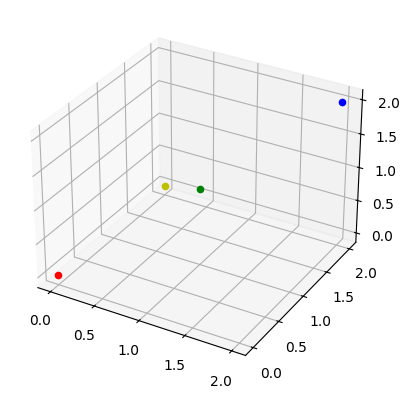

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
t1 = np.array([0, 0, 0])
t2 = np.array([1, 1, 1])
t3 = np.array([2, 2, 2])
t4 = np.array([0, 2, 0])

ax.scatter(t1[0], t1[1], t1[2], color='r')
ax.scatter(t2[0], t2[1], t2[2], color='g')
ax.scatter(t3[0], t3[1], t3[2], color='b')
ax.scatter(t4[0], t4[1], t4[2], color='y')
print(np.linalg.norm(t1 - t2)) # расстояние Евклида
print(np.linalg.norm(t1 - t2) ** 2) # квадрат расстояния Евклида
print(np.linalg.norm(t1 - t2, ord=np.inf)) # расстояние Чебышева
print(np.linalg.norm(t1 - t2, ord=1)) # расстояние Хеминга

plt.show()

№2.3.1

Для предыдущего примера поэкспериментируйте с параметрами классификатора:
1.	Установите другое количество ближайших соседей (k = 1, 5, 10).
2.	Установите размер тестовой выборки 15% от всего датасета.
3.	Постройте графики и оцените качество моделей, проанализируйте результаты.


ИЗНАЧАЛЬНЫЕ ГРАФИКИ


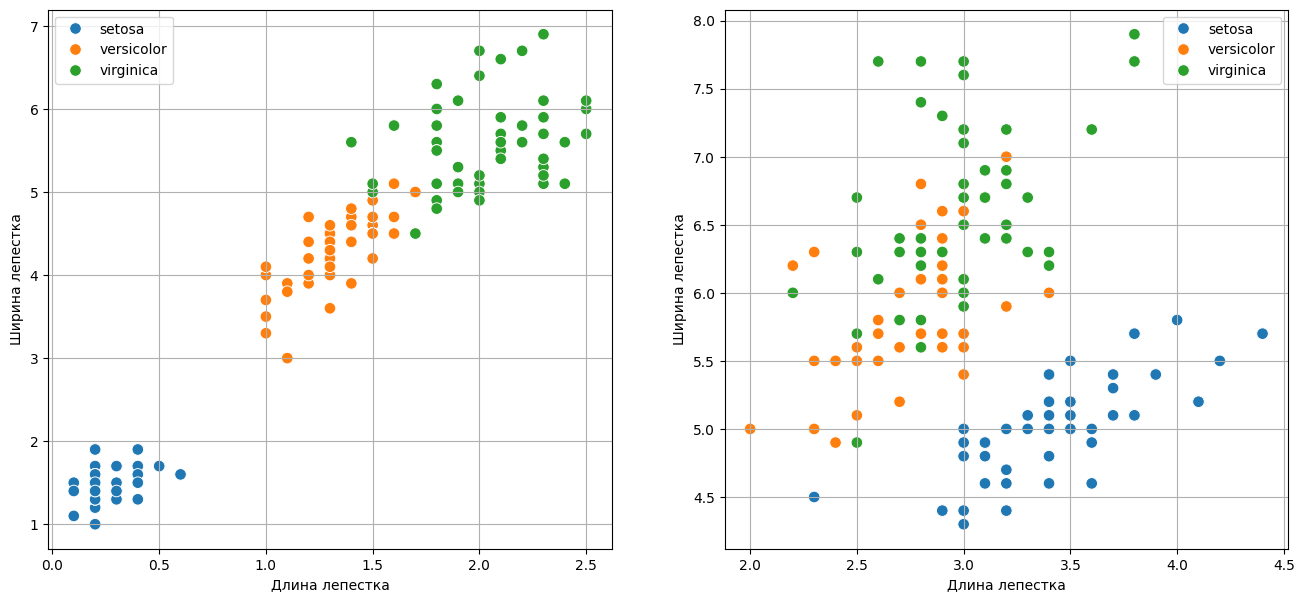

точность модели:  0.913, при k = 1


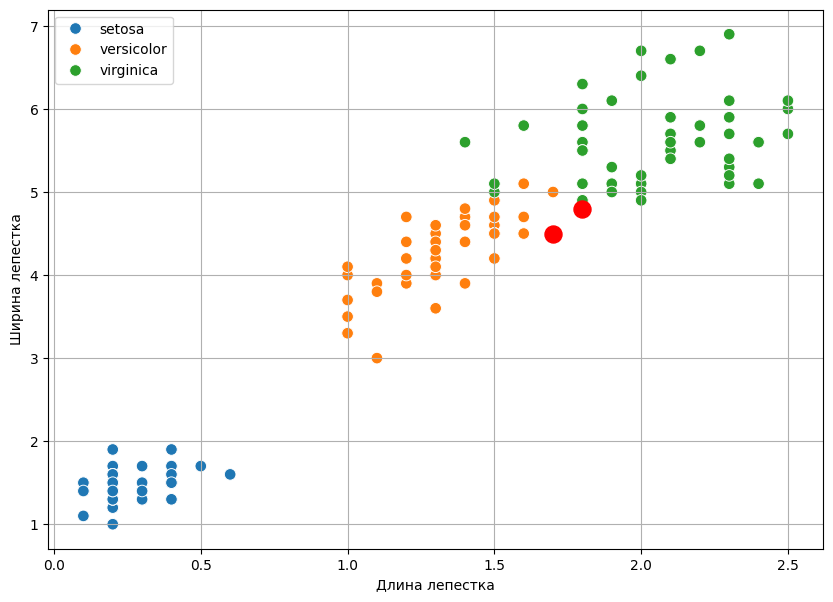

точность модели:  0.957, при k = 5


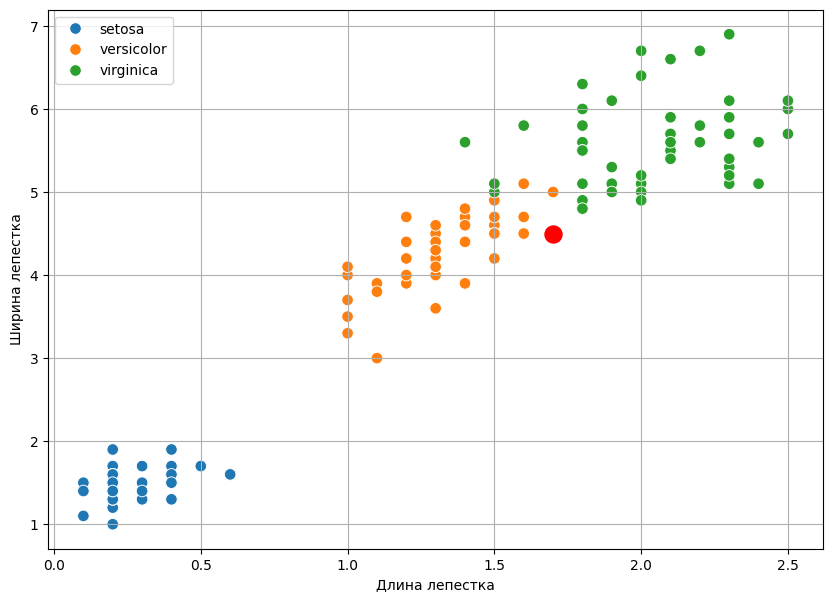

точность модели:  0.957, при k = 10


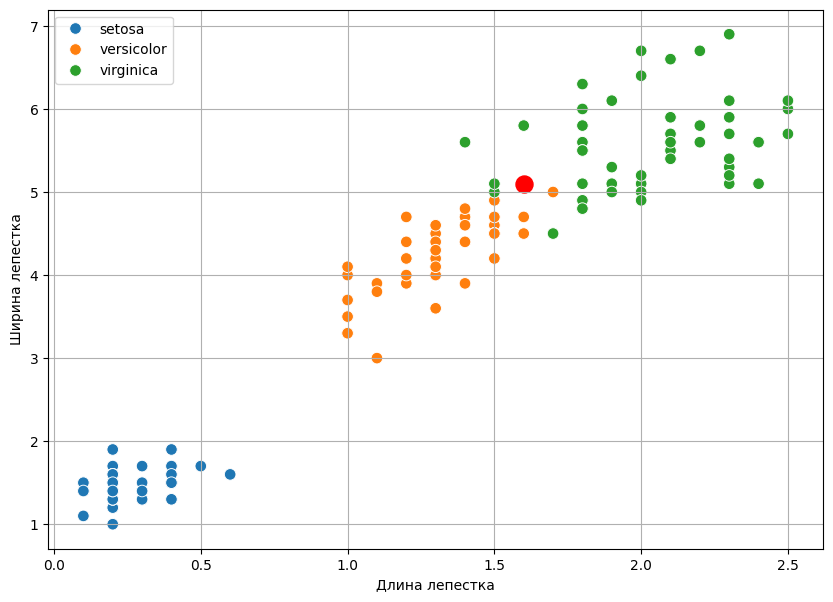

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

iris = sns.load_dataset('iris')
plt.figure(figsize=(16, 7))
print("ИЗНАЧАЛЬНЫЕ ГРАФИКИ")
plt.subplot(121)
sns.scatterplot(data=iris, x='petal_width', y='petal_length', hue='species', s=70)
plt.xlabel("Длина лепестка")
plt.ylabel("Ширина лепестка")
plt.grid()
plt.legend()

plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='sepal_length', hue='species', s=70)
plt.xlabel("Длина лепестка")
plt.ylabel("Ширина лепестка")
plt.legend()
plt.grid()
plt.show()

# ТРЕНИРОВКА МОДЕЛИ
for k in [1, 5, 10]:
    # деление, тренировка и предсказание
    x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], test_size=0.15)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    predict = model.predict(x_test)

    # понятный график успешности модели
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=iris, x='petal_width', y='petal_length', hue='species', s=70)
    plt.xlabel("Длина лепестка")
    plt.ylabel("Ширина лепестка")
    plt.grid()
    plt.legend()

    # график ошибок(красные точки)
    for i in range(len(y_test)):
        if np.array(y_test)[i] != predict[i]:
            plt.scatter(x_test.iloc[i, 3], x_test.iloc[i, 2], c='red', s=150)

    print(f"точность модели: {accuracy_score(y_test, predict) : .3}, при k = {k}")
    plt.show()

№3.3.2

Определите набор признаков человека, по аналогии из РТ 1, – например, цвет глаз и конвертируйте его в матрицу признаков.

In [18]:
from sklearn.feature_extraction import DictVectorizer
data_dict = [{"синий":1, "голубой":2, "серый":3, "зеленый":4, "желтый":5, "карий":6, "красный":7}]
vectorizer = DictVectorizer(sparse=False)
features = vectorizer.fit_transform(data_dict)
features

array([[2., 5., 4., 6., 7., 3., 1.]])